# Clustering Madrid Neighbors

## Load data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
venues = pd.read_csv('madrid_stations_venues.csv', index_col=0)
gym_venues = pd.read_csv('gym_venues.csv', index_col=0)

Import neighborhood data

In [3]:
import geopandas as gp

neigh = gp.read_file("madrid_neigh.shp")
geo_gym = gp.read_file("geo_gym.shp")

In [4]:
#shape of madrid
madrid = neigh.geometry.unary_union

## Filtering the data only within Madrid limits

In [5]:
print(venues.shape)
venues.head()

(8616, 7)


stations  stations Latitude  stations Longitude  \
0  ALTO DEL ARENAL/1          40.389769           -3.645225   
1  ALTO DEL ARENAL/1          40.389769           -3.645225   
2  ALTO DEL ARENAL/1          40.389769           -3.645225   
3  ALTO DEL ARENAL/1          40.389769           -3.645225   
4  ALTO DEL ARENAL/1          40.389769           -3.645225   

                               Venue  Venue Latitude  Venue Longitude  \
0                    Stones Rock Bar       40.391972        -3.649905   
1                Calle Pedro Laborde       40.388294        -3.648227   
2                          AhorraMas       40.391022        -3.643129   
3  Restaurante chino Jardín de bambú       40.388884        -3.642610   
4                       Jardin Bambu       40.388602        -3.641056   

       Venue Category  
0                 Bar  
1            Building  
2       Grocery Store  
3  Chinese Restaurant  
4    Asian Restaurant

In [6]:
geo_venues = gp.GeoDataFrame(
     venues, geometry=gp.points_from_xy(venues['stations Longitude'], venues['stations Latitude']))
#this coordinates are in epsg:4326 we need them with the same as neigh
geo_venues.crs = {'init': 'epsg:4326'}
geo_venues = geo_venues.to_crs(epsg=25830)

In [10]:
print(geo_venues.shape)
geo_venues.head()

(8616, 8)


stations  stations Latitude  stations Longitude  \
0  ALTO DEL ARENAL/1          40.389769           -3.645225   
1  ALTO DEL ARENAL/1          40.389769           -3.645225   
2  ALTO DEL ARENAL/1          40.389769           -3.645225   
3  ALTO DEL ARENAL/1          40.389769           -3.645225   
4  ALTO DEL ARENAL/1          40.389769           -3.645225   

                               Venue  Venue Latitude  Venue Longitude  \
0                    Stones Rock Bar       40.391972        -3.649905   
1                Calle Pedro Laborde       40.388294        -3.648227   
2                          AhorraMas       40.391022        -3.643129   
3  Restaurante chino Jardín de bambú       40.388884        -3.642610   
4                       Jardin Bambu       40.388602        -3.641056   

       Venue Category                                     geometry  
0                 Bar  POINT (445237.9999999992 4471218.999999634)  
1            Building  POINT (445237.9999999992 4471218.999999634)  
2       Grocery Store  POINT (445237.9999999992 4471218.999999634)  
3  Chinese Restaurant  POINT (445237.9999999992 4471218.999999634)  
4    Asian Restaurant  POINT (445237.9999999992 4471218.999999634)

In [11]:
venues_only_madrid = venues[geo_venues.within(madrid)]
print(venues_only_madrid.shape)

(7579, 8)


In [12]:
#we will change the columns names of gym_venues to concatenate all in the same dataframe
gym_venues = gym_venues.rename(columns={'gym':'stations',
                            'gym Latitude':'stations Latitude',
                            'gym Longitude':'stations Longitude'})
gym_venues.head()

stations  stations Latitude  stations Longitude  \
0   place1          40.433487           -3.645917   
1   place1          40.433487           -3.645917   
2   place1          40.433487           -3.645917   
3   place1          40.433487           -3.645917   
4   place1          40.433487           -3.645917   

                         Venue  Venue Latitude  Venue Longitude  \
0                      Docamar       40.433501        -3.648133   
1  El Callejón de Álvarez Gato       40.436425        -3.644408   
2                  Las Farolas       40.434546        -3.645646   
3      Granier Panes Artesanos       40.435455        -3.643282   
4            Taberna Balkanika       40.433097        -3.645560   

     Venue Category  
0  Tapas Restaurant  
1               Bar  
2       Coffee Shop  
3            Bakery  
4        Restaurant

In [13]:
columns = gym_venues.columns
venues = pd.concat([venues_only_madrid[columns], gym_venues])
print(venues.shape)

(7685, 7)


In [14]:
venues.head()

stations  stations Latitude  stations Longitude  \
0  ALTO DEL ARENAL/1          40.389769           -3.645225   
1  ALTO DEL ARENAL/1          40.389769           -3.645225   
2  ALTO DEL ARENAL/1          40.389769           -3.645225   
3  ALTO DEL ARENAL/1          40.389769           -3.645225   
4  ALTO DEL ARENAL/1          40.389769           -3.645225   

                               Venue  Venue Latitude  Venue Longitude  \
0                    Stones Rock Bar       40.391972        -3.649905   
1                Calle Pedro Laborde       40.388294        -3.648227   
2                          AhorraMas       40.391022        -3.643129   
3  Restaurante chino Jardín de bambú       40.388884        -3.642610   
4                       Jardin Bambu       40.388602        -3.641056   

       Venue Category  
0                 Bar  
1            Building  
2       Grocery Store  
3  Chinese Restaurant  
4    Asian Restaurant

## Venue data preparation

We remove the venues Metro station and train station

In [15]:
# we will remove train station, metro station and light rail station
venues = venues[venues['Venue Category'] != 'Train Station']
venues = venues[venues['Venue Category'] != 'Metro Station']
venues = venues[venues['Venue Category'] != 'Tram Station']
venues = venues[venues['Venue Category'] != 'Light Rail Station']
venues.shape

(7587, 7)

### How many venues per station are there?

In [16]:
venues_per_station = venues.groupby('stations').count()\
    .sort_values(by='Venue', ascending=False)\
    .reset_index().iloc[:,0:2].rename(columns = {'stations Latitude':'n'})

In [17]:
print(venues_per_station.shape)
venues_per_station

(216, 2)


stations    n
0                       EMBAJADORES/3  100
1                            BILBAO/1  100
2                           QUEVEDO/2  100
3                     DIEGO DE LEON/4  100
4               PRINCIPE DE VERGARA/2  100
5                 PLAZA DE ESPAÑA/10A  100
6                   BANCO DE ESPAÑA/2  100
7                             OPERA/2  100
8                   NUÑEZ DE BALBOA/5  100
9                       RUBEN DARIO/5  100
10                           CALLAO/3  100
11                        NOVICIADO/2  100
12                         GRAN VIA/1  100
13                        LA LATINA/5  100
14                            COLON/4  100
15                           CHUECA/5  100
16                      RECOLETOS/C-1  100
17                             GOYA/2  100
18                     SAN BERNARDO/2  100
19                    SANTO DOMINGO/2  100
20                        VELAZQUEZ/4  100
21                         TRIBUNAL/1  100
22                  TIRSO DE MOLINA/1  100
23                          SEVILLA/2  100
24                          SERRANO/4  100
25                              SOL/1  100
26                     ANTON MARTIN/1  100
27                ALONSO MARTINEZ/10A   97
28              SANTIAGO BERNABEU/10A   90
29                         LAVAPIES/3   90
..                                ...  ...
186                COLONIA JARDIN/10A    6
187                       ABRANTES/11    6
188                     VALDEZARZA/7A    6
189                 ALTO DEL ARENAL/1    6
190                     MIRASIERRA/9A    6
191                  SAN FRANCISCO/11    6
192                   SAN CRISTOBAL/3    6
193                      VALLECAS/C-2    6
194                 VILLAVERDE ALTO/3    5
195               VILLA DE VALLECAS/1    5
196      CANTOBLANCO UNIVERSIDAD/C-4A    5
197                   METROPOLITANO/6    5
198                PUENTE ALCOCER/C-5    5
199                        CONGOSTO/1    5
200             AVIACION ESPAÑOLA/10A    5
201                       SIMANCAS/7A    5
202                     VALDECARROS/1    4
203                     ORCASITAS/C-5    4
204                CUATRO VIENTOS/10A    4
205                   GOLOSO, EL/C-4B    3
206      SAN CRISTOBAL INDUSTRIAL/C-3    3
207              PUERTA DE ARGANDA/9A    3
208                    PAN BENDITO/11    3
209                    VALDEBEBAS/C-1    3
210                       SAN BLAS/7A    3
211  SAN CRISTOBAL DE LOS ANGELES/C-3    3
212                          PITIS/7A    2
213                 CASA DE CAMPO/10A    2
214      UNIVERSIDAD P. COMILLAS/C-4A    1
215                      POZO, EL/C-2    1

[216 rows x 2 columns]

In [18]:
estaciones = pd.read_csv('madrid_sss.csv', index_col=0)
estaciones['name'] = estaciones['station'] + '/' + estaciones['line']
estaciones = estaciones[['name', 'Latitude', 'Longitude']]

nombres_more_than99 = venues_per_station[venues_per_station['n']== 100].stations.tolist()
estaciones_more_than99 = estaciones[estaciones['name'].isin(nombres_more_than99)]
print(estaciones_more_than99.shape)
estaciones_more_than99.head()

(27, 3)


name   Latitude  Longitude
2      ANTON MARTIN/1  40.412464  -3.699376
6            BILBAO/1  40.429050  -3.702188
12         GRAN VIA/1  40.420006  -3.701811
26              SOL/1  40.416870  -3.703264
28  TIRSO DE MOLINA/1  40.412342  -3.704666

### Map of the stations with more venues

In [19]:
import folium
mapi = folium.Map(location=[estaciones_more_than99.Latitude.mean(), estaciones_more_than99.Longitude.mean()], 
                  zoom_start=12,
                  control_scale = True)
folium.TileLayer('cartodbpositron', attr='igs').add_to(mapi)

choropleth = folium.Choropleth(
    geo_data=neigh,
    data=neigh[['low_name','density']],
    columns=['low_name','density'],
    key_on='feature.properties.low_name',
    fill_color='YlGn',
    fillOpacity= 0.1,
    legend_name='density (inhabitats per square km)',
    highlight=True
).add_to(mapi)

choropleth.geojson.add_child(
    folium.features.GeoJsonTooltip(['density','Barrio'])
)

for lat, lon, poi in zip(estaciones_more_than99['Latitude'], 
                                  estaciones_more_than99['Longitude'], 
                                  estaciones_more_than99['name']):
    label = folium.Popup(str(poi), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=2,
        popup=label,
        color='blue',
        fill=True,
        fill_color='blue',
        fill_opacity=0.7).add_to(mapi)
    
for lat, lon, name in zip(geo_gym['lat'], 
                    geo_gym['lon'],
                    geo_gym['name']     ):
    folium.Marker([lat, lon],
                 icon=folium.Icon(color='red',icon='home'),
                 popup = name).add_to(mapi)
       
mapi


Stations with less than 5 venues

In [20]:
print(venues_per_station[venues_per_station['n']<5].shape)
venues_per_station[venues_per_station['n']<5]

(14, 2)


stations  n
202                     VALDECARROS/1  4
203                     ORCASITAS/C-5  4
204                CUATRO VIENTOS/10A  4
205                   GOLOSO, EL/C-4B  3
206      SAN CRISTOBAL INDUSTRIAL/C-3  3
207              PUERTA DE ARGANDA/9A  3
208                    PAN BENDITO/11  3
209                    VALDEBEBAS/C-1  3
210                       SAN BLAS/7A  3
211  SAN CRISTOBAL DE LOS ANGELES/C-3  3
212                          PITIS/7A  2
213                 CASA DE CAMPO/10A  2
214      UNIVERSIDAD P. COMILLAS/C-4A  1
215                      POZO, EL/C-2  1

#### Removing stations with less than 5 venues

In [21]:
less_than5_stations = venues_per_station[venues_per_station['n']<5].stations.to_list()
venues = venues[~venues['stations'].isin(less_than5_stations)]
print(venues.shape)

(7548, 7)


### How many unique categories  are there?

In [22]:
print('There are {} uniques categories.'.format(len(venues['Venue Category'].unique())))

There are 301 uniques categories.


In [23]:
venues.groupby('Venue Category').count()\
    .sort_values(by='Venue', ascending=False)\
    .reset_index().iloc[:,0:2].rename(columns = {'stations':'n'})[:10]

Venue Category    n
0  Spanish Restaurant  779
1          Restaurant  487
2                 Bar  343
3    Tapas Restaurant  340
4               Hotel  296
5                Café  226
6         Coffee Shop  189
7               Plaza  184
8  Italian Restaurant  159
9              Bakery  158

### Prepare the data for Clustering
#### One hot encoding

In [24]:
# one hot encoding
madrid_onehot = pd.get_dummies(venues[['Venue Category']], prefix="", prefix_sep="")
cols = list(madrid_onehot.columns)
madrid_onehot.shape

(7548, 301)

In [25]:
# Insert the column station
cols = list(madrid_onehot.columns)
madrid_onehot['station'] = venues.stations
madrid_onehot = madrid_onehot[['station'] + cols]
madrid_onehot.head()

station  Accessories Store  Adult Boutique  Airport Gate  \
0  ALTO DEL ARENAL/1                  0               0             0   
1  ALTO DEL ARENAL/1                  0               0             0   
2  ALTO DEL ARENAL/1                  0               0             0   
3  ALTO DEL ARENAL/1                  0               0             0   
4  ALTO DEL ARENAL/1                  0               0             0   

   Airport Lounge  Airport Service  Airport Terminal  American Restaurant  \
0               0                0                 0                    0   
1               0                0                 0                    0   
2               0                0                 0                    0   
3               0                0                 0                    0   
4               0                0                 0                    0   

   Arcade  Arepa Restaurant  ...  Used Bookstore  \
0       0                 0  ...               0   
1       0                 0  ...               0   
2       0                 0  ...               0   
3       0                 0  ...               0   
4       0                 0  ...               0   

   Vegetarian / Vegan Restaurant  Venezuelan Restaurant  Video Game Store  \
0                              0                      0                 0   
1                              0                      0                 0   
2                              0                      0                 0   
3                              0                      0                 0   
4                              0                      0                 0   

   Vietnamese Restaurant  Whisky Bar  Wine Bar  Wine Shop  Women's Store  \
0                      0           0         0          0              0   
1                      0           0         0          0              0   
2                      0           0         0          0              0   
3                      0           0         0          0              0   
4                      0           0         0          0              0   

   Yoga Studio  
0            0  
1            0  
2            0  
3            0  
4            0  

[5 rows x 302 columns]

#### Group by station

In [26]:
madrid_onehot_grouped = madrid_onehot.groupby('station').mean().reset_index()
print(madrid_onehot_grouped.shape)
madrid_onehot_grouped.head()

(202, 302)


station  Accessories Store  Adult Boutique  Airport Gate  \
0            ABRANTES/11           0.000000             0.0      0.000000   
1              ACACIAS/5           0.000000             0.0      0.000000   
2  AEROPUERTO T1 T2 T3/8           0.029412             0.0      0.058824   
3        AEROPUERTO T4/8           0.030303             0.0      0.000000   
4       AGUILAS, LAS/C-5           0.000000             0.0      0.000000   

   Airport Lounge  Airport Service  Airport Terminal  American Restaurant  \
0        0.000000         0.000000          0.000000                  0.0   
1        0.000000         0.000000          0.000000                  0.0   
2        0.088235         0.117647          0.117647                  0.0   
3        0.060606         0.121212          0.030303                  0.0   
4        0.000000         0.000000          0.000000                  0.0   

   Arcade  Arepa Restaurant  ...  Used Bookstore  \
0     0.0               0.0  ...             0.0   
1     0.0               0.0  ...             0.0   
2     0.0               0.0  ...             0.0   
3     0.0               0.0  ...             0.0   
4     0.0               0.0  ...             0.0   

   Vegetarian / Vegan Restaurant  Venezuelan Restaurant  Video Game Store  \
0                            0.0                    0.0               0.0   
1                            0.0                    0.0               0.0   
2                            0.0                    0.0               0.0   
3                            0.0                    0.0               0.0   
4                            0.0                    0.0               0.0   

   Vietnamese Restaurant  Whisky Bar  Wine Bar  Wine Shop  Women's Store  \
0                    0.0         0.0  0.000000   0.000000            0.0   
1                    0.0         0.0  0.000000   0.029412            0.0   
2                    0.0         0.0  0.000000   0.000000            0.0   
3                    0.0         0.0  0.030303   0.000000            0.0   
4                    0.0         0.0  0.000000   0.000000            0.0   

   Yoga Studio  
0          0.0  
1          0.0  
2          0.0  
3          0.0  
4          0.0  

[5 rows x 302 columns]

In [103]:
#dataframe for weighted
madrid_onehot_sum = madrid_onehot.groupby('station').sum().reset_index()
madrid_onehot_sum.head()

station  Accessories Store  Adult Boutique  Airport Gate  \
0            ABRANTES/11                  0               0             0   
1              ACACIAS/5                  0               0             0   
2  AEROPUERTO T1 T2 T3/8                  1               0             2   
3        AEROPUERTO T4/8                  1               0             0   
4       AGUILAS, LAS/C-5                  0               0             0   

   Airport Lounge  Airport Service  Airport Terminal  American Restaurant  \
0               0                0                 0                    0   
1               0                0                 0                    0   
2               3                4                 4                    0   
3               2                4                 1                    0   
4               0                0                 0                    0   

   Arcade  Arepa Restaurant  ...  Used Bookstore  \
0       0                 0  ...               0   
1       0                 0  ...               0   
2       0                 0  ...               0   
3       0                 0  ...               0   
4       0                 0  ...               0   

   Vegetarian / Vegan Restaurant  Venezuelan Restaurant  Video Game Store  \
0                              0                      0                 0   
1                              0                      0                 0   
2                              0                      0                 0   
3                              0                      0                 0   
4                              0                      0                 0   

   Vietnamese Restaurant  Whisky Bar  Wine Bar  Wine Shop  Women's Store  \
0                      0           0         0          0              0   
1                      0           0         0          1              0   
2                      0           0         0          0              0   
3                      0           0         1          0              0   
4                      0           0         0          0              0   

   Yoga Studio  
0            0  
1            0  
2            0  
3            0  
4            0  

[5 rows x 302 columns]

In [107]:
#weights
Y = madrid_onehot_sum.sum(axis=1)
Y.shape

(202,)

##### Order the columns

In [27]:
ordered_columns = madrid_onehot_grouped.sum()[1:].sort_values(ascending=False).index.to_list()
madrid_onehot_sorted = madrid_onehot_grouped[['station'] + ordered_columns]

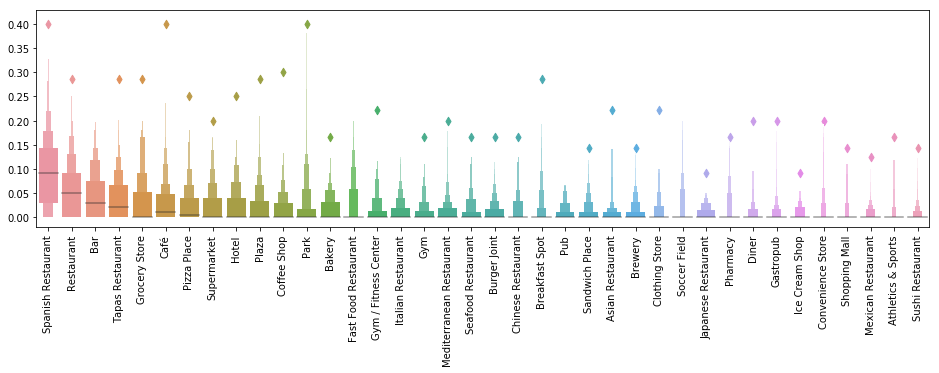

In [28]:
f, axes = plt.subplots(1, 1, figsize=(16, 4))
sns.boxenplot(ax=axes,data=madrid_onehot_sorted.iloc[:,1:39])
plt.xticks(rotation=90)
plt.show()

#### We can combine some of the venues that are the same

In [29]:
madrid_onehot_refine = pd.DataFrame(madrid_onehot_sorted)
madrid_onehot_refine = madrid_onehot_refine.drop(columns=['Spanish Restaurant',
                                               'Restaurant',
                                               'Café',
                                               'Coffee Shop',
                                               'Gym / Fitness Center',
                                               'Gym'])
madrid_onehot_refine['Restaurant'] = madrid_onehot_sorted['Spanish Restaurant'] +\
                                                madrid_onehot_sorted['Restaurant']

madrid_onehot_refine['Coffe Shop'] = madrid_onehot_sorted['Café'] +\
                                                madrid_onehot_sorted['Coffee Shop']

madrid_onehot_refine['Gym'] = madrid_onehot_sorted['Gym / Fitness Center'] +\
                                                madrid_onehot_sorted['Gym']

#sort columns again

ordered_columns = madrid_onehot_refine.sum()[1:].sort_values(ascending=False).index.to_list()
madrid_onehot_refine = madrid_onehot_refine[['station'] + ordered_columns]

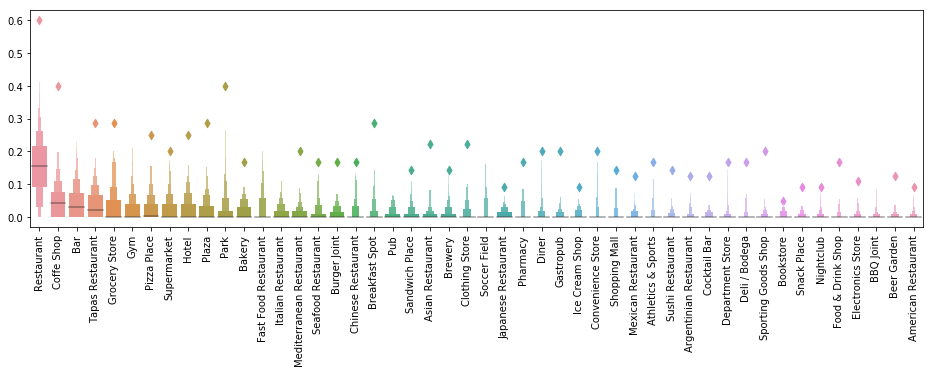

In [30]:
f, axes = plt.subplots(1, 1, figsize=(16, 4))
sns.boxenplot(ax=axes,data=madrid_onehot_refine.iloc[:,1:49])
plt.xticks(rotation=90)
plt.show()

In [40]:
madrid_onehot_refine.head()

station  Restaurant  Coffe Shop       Bar  Tapas Restaurant  \
0            ABRANTES/11    0.166667    0.000000  0.000000          0.000000   
1              ACACIAS/5    0.058824    0.029412  0.058824          0.088235   
2  AEROPUERTO T1 T2 T3/8    0.000000    0.117647  0.000000          0.000000   
3        AEROPUERTO T4/8    0.090909    0.090909  0.000000          0.000000   
4       AGUILAS, LAS/C-5    0.235294    0.058824  0.176471          0.058824   

   Grocery Store       Gym  Pizza Place  Supermarket     Hotel  ...  \
0       0.000000  0.000000     0.166667          0.0  0.000000  ...   
1       0.029412  0.058824     0.058824          0.0  0.000000  ...   
2       0.000000  0.000000     0.000000          0.0  0.000000  ...   
3       0.000000  0.000000     0.000000          0.0  0.030303  ...   
4       0.000000  0.000000     0.000000          0.0  0.000000  ...   

   Cajun / Creole Restaurant  Lebanese Restaurant  College Classroom  \
0                        0.0                  0.0                0.0   
1                        0.0                  0.0                0.0   
2                        0.0                  0.0                0.0   
3                        0.0                  0.0                0.0   
4                        0.0                  0.0                0.0   

   Grilled Meat Restaurant  Adult Boutique  Fountain  Hawaiian Restaurant  \
0                      0.0             0.0       0.0                  0.0   
1                      0.0             0.0       0.0                  0.0   
2                      0.0             0.0       0.0                  0.0   
3                      0.0             0.0       0.0                  0.0   
4                      0.0             0.0       0.0                  0.0   

   Photography Lab  Palace  Neighborhood  
0              0.0     0.0           0.0  
1              0.0     0.0           0.0  
2              0.0     0.0           0.0  
3              0.0     0.0           0.0  
4              0.0     0.0           0.0  

[5 rows x 299 columns]

### Most common venues in dataframe

In [31]:
#First, let's write a function to sort the venues in descending order.

def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

#Now let's create the new dataframe and display the top 10 venues for each neighborhood.

num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['station']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
stations_venues_sorted = pd.DataFrame(columns=columns)
stations_venues_sorted['station'] = madrid_onehot_refine['station']

for ind in np.arange(madrid_onehot_refine.shape[0]):
    stations_venues_sorted.iloc[ind, 1:] = return_most_common_venues(madrid_onehot_refine.iloc[ind, :], num_top_venues)

stations_venues_sorted.head()

station 1st Most Common Venue 2nd Most Common Venue  \
0            ABRANTES/11            Restaurant           Pizza Place   
1              ACACIAS/5      Tapas Restaurant           Art Gallery   
2  AEROPUERTO T1 T2 T3/8            Coffe Shop       Airport Service   
3        AEROPUERTO T4/8       Airport Service            Restaurant   
4       AGUILAS, LAS/C-5            Restaurant                   Bar   

  3rd Most Common Venue 4th Most Common Venue 5th Most Common Venue  \
0          Soccer Field  Fast Food Restaurant    Athletics & Sports   
1            Restaurant                   Bar                   Gym   
2      Airport Terminal        Duty-free Shop   Rental Car Location   
3            Coffe Shop        Airport Lounge         Deli / Bodega   
4         Shopping Mall              Gym Pool     Convenience Store   

  6th Most Common Venue 7th Most Common Venue 8th Most Common Venue  \
0                  Park                  Lake              Gym Pool   
1           Pizza Place               Theater           Event Space   
2        Airport Lounge          Airport Gate           Bus Station   
3  Fast Food Restaurant           Bus Station     Accessories Store   
4    Seafood Restaurant                  Park            Smoke Shop   

  9th Most Common Venue 10th Most Common Venue  
0                Arcade                 Office  
1   Sporting Goods Shop              Bookstore  
2                 Diner     Frozen Yogurt Shop  
3   Rental Car Location         Police Station  
4   Sporting Goods Shop       Tapas Restaurant

## Save the data before clustering

In [32]:
print(madrid_onehot_refine.shape)
print(stations_venues_sorted.shape)

(202, 299)
(202, 11)


### Save

In [33]:
madrid_onehot_refine.to_csv('madrid_onehot_refine.csv')
stations_venues_sorted.to_csv('madrid_stations_venues_sorted.csv')

### Load

In [34]:
import pandas as pd
madrid_onehot_grouped = pd.read_csv('madrid_onehot_refine.csv', index_col=0)
stations_venues_sorted = pd.read_csv('madrid_stations_venues_sorted.csv', index_col=0)

print(madrid_onehot_grouped.shape)
print(stations_venues_sorted.shape)

(202, 299)
(202, 11)


## Visualization

function for plotting maps with clusters colors

In [256]:
import folium
import matplotlib.cm as cm
import matplotlib.colors as colors
# open

# create map of Barcelona using latitude and longitude mean values and clusters
def show_in_map(data, k):
    map_clusters = folium.Map(location=[data.Latitude.mean(), data.Longitude.mean()], 
                              zoom_start=11, control_scale=True)
    folium.TileLayer('cartodbpositron', attr='igs').add_to(map_clusters)
    
    choropleth = folium.Choropleth(
        geo_data=neigh,
        data=neigh[['low_name','density']],
        columns=['low_name','density'],
        key_on='feature.properties.low_name',
        fill_color='YlGn',
        fillOpacity= 0.1,
        legend_name='density (inhabitats per square km)',
        highlight=True
    ).add_to(map_clusters)

    choropleth.geojson.add_child(
        folium.features.GeoJsonTooltip(['density','Barrio'])
    )

    for lat, lon, name in zip(geo_gym['lat'], 
                        geo_gym['lon'],
                        geo_gym['name']     ):
        folium.Marker([lat, lon],
                     icon=folium.Icon(color='red',icon='home'),
                     popup = name).add_to(map_clusters)
    
    # set color scheme for the clusters
    x = np.arange(k)
    ys = [i + x + (i*x)**2 for i in range(kclusters)]
    colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
    rainbow = [colors.rgb2hex(i) for i in colors_array]

    # add markers to the map
    markers_colors = []
    for lat, lon, poi, cluster in zip(data['Latitude'], 
                                      data['Longitude'], 
                                      data['station'], 
                                      data['Cluster Labels']):
        label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
        folium.CircleMarker(
            [lat, lon],
            radius=5,
            popup=label,
            color=rainbow[cluster],
            fill=True,
            fill_color=rainbow[cluster],
            fill_opacity=0.7).add_to(map_clusters)
        
    legend_start =   '''
                <div style="position: fixed; 
                            top: 50px; left: 50px; width: 100px; 
                            border:2px solid grey; z-index:9999; font-size:14px;
                            background-color: hsla(89, 43%, 51%, 0.3);
                            ">&nbsp; Legend <br>
                '''
    legend_end =    '''             
                    </div>
                    ''' 
    legend_html = legend_start 
    for pp in range(kclusters):
        leg = '&nbsp; Cluster {} &nbsp; <i class="fa fa-circle" style="color:{}"></i><br>'.format(pp, rainbow[pp])
        legend_html = legend_html + leg
                                                                                                  
    legend_html = legend_html + legend_end

    map_clusters.get_root().html.add_child(folium.Element(legend_html))
    

    return map_clusters


Save the file stations line and coordinates of Madrid

In [36]:
#Madrid Stations
madrid_stations = venues.iloc[:,0:3]
madrid_stations = madrid_stations.drop_duplicates('stations', keep='first')
madrid_stations = madrid_stations.rename(columns={'stations Longitude':'Longitude', 'stations Latitude':'Latitude'})
madrid_stations['station'] = madrid_stations['stations'].apply(lambda x: x.split('/')[0])

madrid_stations['line'] = madrid_stations['stations'].apply(\
                                    lambda x: x.split('/')[1] if (len(x.split('/')) > 1) else x.split('/')[0])
madrid_stations = madrid_stations[['station','line','Longitude','Latitude']]

madrid_stations.to_csv('madrid_stations_unique.csv')

In [38]:
# Madrid Stations
madrid_stations = pd.read_csv('madrid_stations_unique.csv', index_col=0)

def create_map(data, height='100%', width='100%'):
    mapi = folium.Map(location=[data.Latitude.mean(), data.Longitude.mean()], 
                      zoom_start=12,
                      control_scale = True, height=height, width=width)
    folium.TileLayer('cartodbpositron', attr='igs').add_to(mapi)

    # set color scheme for the clusters
    n = len(data['line'].unique())
    x = np.arange(n)
    perro = dict(zip(data['line'].unique(),x))
    ys = [i + x + (i*x)**2 for i in range(n)]
    colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
    rainbow = [colors.rgb2hex(i) for i in colors_array]



    # add markers to the map
    markers_colors = []
    for lat, lon, poi, line in zip(data['Latitude'], 
                                      data['Longitude'], 
                                      data['station'], 
                                      data['line']):
        label = folium.Popup(str(poi) + ' Line ' + str(line), parse_html=True)
        folium.CircleMarker(
            [lat, lon],
            radius=2,
            popup=label,
            color=rainbow[perro[line]-1],
            fill=True,
            fill_color=rainbow[int(perro[line])-1],
            fill_opacity=0.7).add_to(mapi)

    return mapi

create_map(madrid_stations)

## Clustering

In [41]:
onehot = madrid_onehot_grouped.copy()
mostcomon_venues = stations_venues_sorted.copy()

In [108]:
onehot.shape

(202, 299)

### Kmeans

In [45]:
# import k-means from clustering stage
from sklearn.cluster import KMeans

In [64]:
#Data for clustering
data_clustering = onehot.drop('station', 1)

Checking the best k for the dataset

In [176]:
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score

# Run the Kmeans algorithm and get the index of data points clusters
sse = []
list_k = list(range(2, 20))

for k in list_k:
    km = KMeans(n_clusters=k, random_state=0)
    km.fit(data_clustering)
    sse.append(km.inertia_)


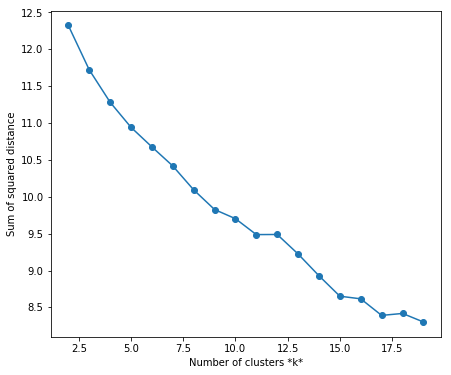

In [177]:
# Plot sse against k
plt.figure(figsize=(7, 6))
plt.plot(list_k, sse, '-o')
plt.xlabel(r'Number of clusters *k*')
plt.ylabel('Sum of squared distance')

plt.show()

In [178]:
#siluethe score
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score

# Run the Kmeans algorithm and get the index of data points clusters
sse = []
list_k = list(range(2, 20))

for k in list_k:
    km = KMeans(n_clusters=k, random_state=0)
    cluster_labels = km.fit_predict(data_clustering)
    silhouette_avg = silhouette_score(data_clustering, cluster_labels)
    sse.append(silhouette_avg)

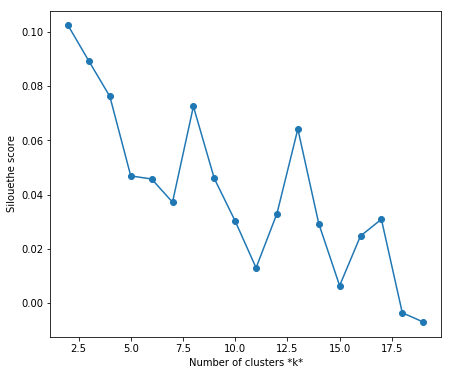

In [179]:
# Plot sse against k
plt.figure(figsize=(7, 6))
plt.plot(list_k, sse, '-o')
plt.xlabel(r'Number of clusters *k*')
plt.ylabel('Silouethe score')

plt.show()

### Kmeans weighted

In [ ]:

#wt_kmeansclus = kmeans.fit(X,sample_weight = Y)
#predicted_kmeans = kmeans.predict(X, sample_weight = Y)

In [189]:
# Run the Kmeans algorithm and get the index of data points clusters
sse = []
list_k = list(range(2, 20))

for k in list_k:
    km = KMeans(n_clusters=k, random_state=0)
    km.fit(data_clustering, sample_weight=Y)
    sse.append(km.inertia_)

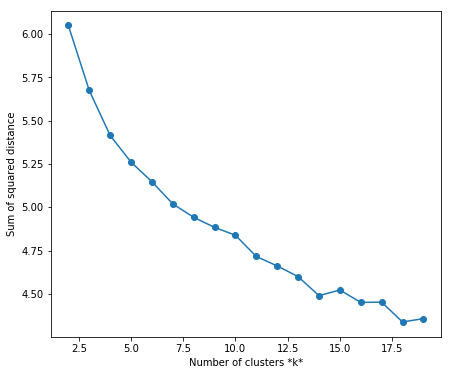

In [190]:
# Plot sse against k
plt.figure(figsize=(7, 6))
plt.plot(list_k, sse, '-o')
plt.xlabel(r'Number of clusters *k*')
plt.ylabel('Sum of squared distance')

plt.show()

In [191]:
#siluethe score
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score

# Run the Kmeans algorithm and get the index of data points clusters
sse = []
list_k = list(range(2, 20))

for k in list_k:
    km = KMeans(n_clusters=k, random_state=0)
    cluster_labels = km.fit_predict(data_clustering, sample_weight=Y)
    silhouette_avg = silhouette_score(data_clustering, cluster_labels)
    sse.append(silhouette_avg)

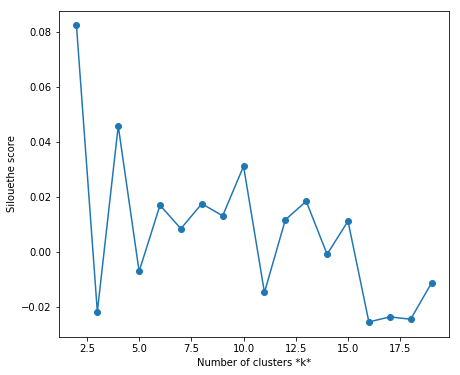

In [192]:
# Plot sse against k
plt.figure(figsize=(7, 6))
plt.plot(list_k, sse, '-o')
plt.xlabel(r'Number of clusters *k*')
plt.ylabel('Silouethe score')

plt.show()

#### There is not clear elbow in the graph. We can take k = 4, beacause the curve starts to change the slope rapidly from here
### K = 4

In [208]:

# set number of clusters
kclusters = 4

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(data_clustering, sample_weight=Y)
#kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(data_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10]

array([2, 0, 3, 3, 0, 3, 0, 1, 0, 3])

## Visualizing the clusters

In [209]:
print("Locations by Cluster", kmeans.labels_.shape)
pd.Series(kmeans.labels_).value_counts()

Locations by Cluster (202,)


1    66
0    58
2    40
3    38
dtype: int64

In [210]:
# add clustering labels
mcv = mostcomon_venues.copy()
mcv.insert(0, 'Cluster Labels', kmeans.labels_)

madrid_merged = madrid_stations.iloc[:,1:]
madrid_merged['station'] = madrid_stations['station'] + '/' + madrid_stations['line']

# merge barcelona_stations with barcelona_merged to add latitude/longitude for each neighborhood
madrid_merged = madrid_merged.join(mcv.set_index('station'), on='station')


madrid_merged = madrid_merged.dropna()
madrid_merged = madrid_merged.astype({'Cluster Labels':'int32'})

print(madrid_merged.shape)
madrid_merged.head()

(199, 15)


line  Longitude   Latitude            station  Cluster Labels  \
0      1  -3.645225  40.389769  ALTO DEL ARENAL/1               2   
6      1  -3.703318  40.450331         ALVARADO/1               1   
47     1  -3.699376  40.412463     ANTON MARTIN/1               3   
147    1  -3.692491  40.408847           ATOCHA/1               3   
206    1  -3.689380  40.406586     ATOCHA RENFE/1               3   

    1st Most Common Venue 2nd Most Common Venue 3rd Most Common Venue  \
0        Asian Restaurant                   Bar         Grocery Store   
6              Restaurant                   Bar         Grocery Store   
47             Restaurant                 Hotel                   Bar   
147            Restaurant            Coffe Shop                 Hotel   
206            Restaurant                 Hotel         Grocery Store   

    4th Most Common Venue 5th Most Common Venue 6th Most Common Venue  \
0             Pizza Place    Chinese Restaurant              Building   
6             Pizza Place    Seafood Restaurant                 Hotel   
47             Coffe Shop               Theater      Tapas Restaurant   
147                   Bar                Garden        Sandwich Place   
206                Garden             Bookstore                Museum   

        7th Most Common Venue 8th Most Common Venue 9th Most Common Venue  \
0           German Restaurant        Soccer Stadium      Kebab Restaurant   
6                      Bakery    Frozen Yogurt Shop      Kebab Restaurant   
47                  Jazz Club             Bookstore                Hostel   
147  Mediterranean Restaurant    Italian Restaurant                Museum   
206            Sandwich Place            Art Museum      Tapas Restaurant   

    10th Most Common Venue  
0       Miscellaneous Shop  
6                Gastropub  
47      Mexican Restaurant  
147             Art Museum  
206     Falafel Restaurant

In [257]:
show_in_map(madrid_merged, kclusters)

### Boxplots

In [212]:
madrid_onehot_clusters = onehot.copy()
madrid_onehot_clusters.insert(0, 'Cluster Labels', kmeans.labels_)

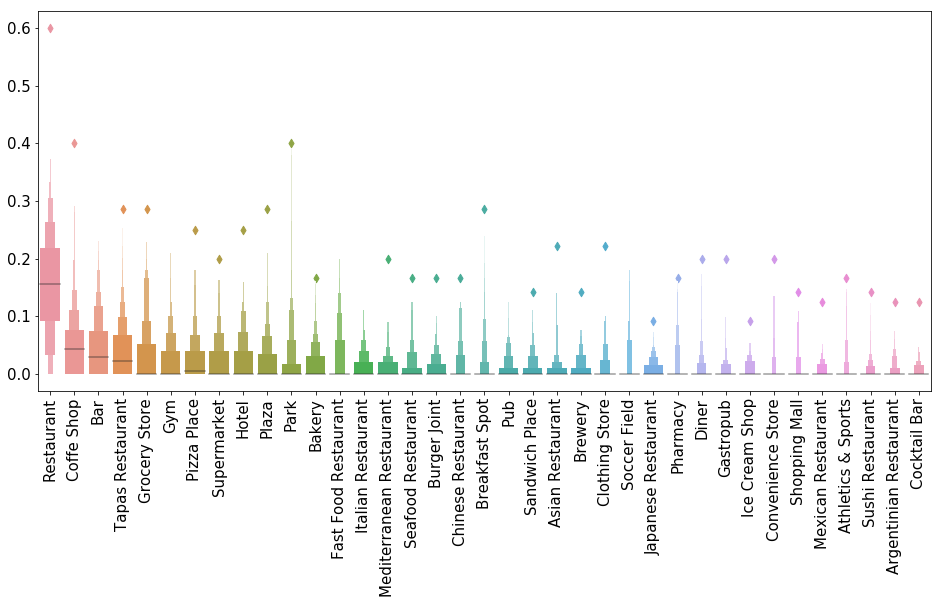

In [213]:
f, axes = plt.subplots(1, 1, figsize=(16, 7))
sns.boxenplot(ax=axes,data=madrid_onehot_clusters.iloc[:,2:39])
axes.tick_params(axis='both', which='major', labelsize=15)
plt.xticks(rotation=90)
plt.show()

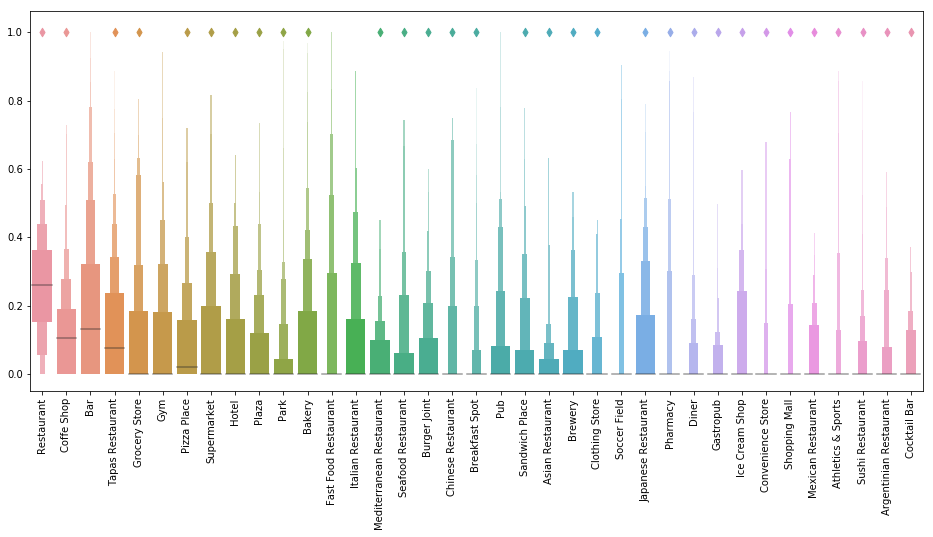

In [214]:
## Same graph normalize
madrid_norm = madrid_onehot_clusters.copy()
madrid_norm.iloc[:,1:] = madrid_norm.iloc[:,2:].apply(lambda x: x/x.max(), axis=0)

f, axes = plt.subplots(1, 1, figsize=(16, 7))
sns.boxenplot(ax=axes,data=madrid_norm.iloc[:,2:39])
plt.xticks(rotation=90)
plt.show()

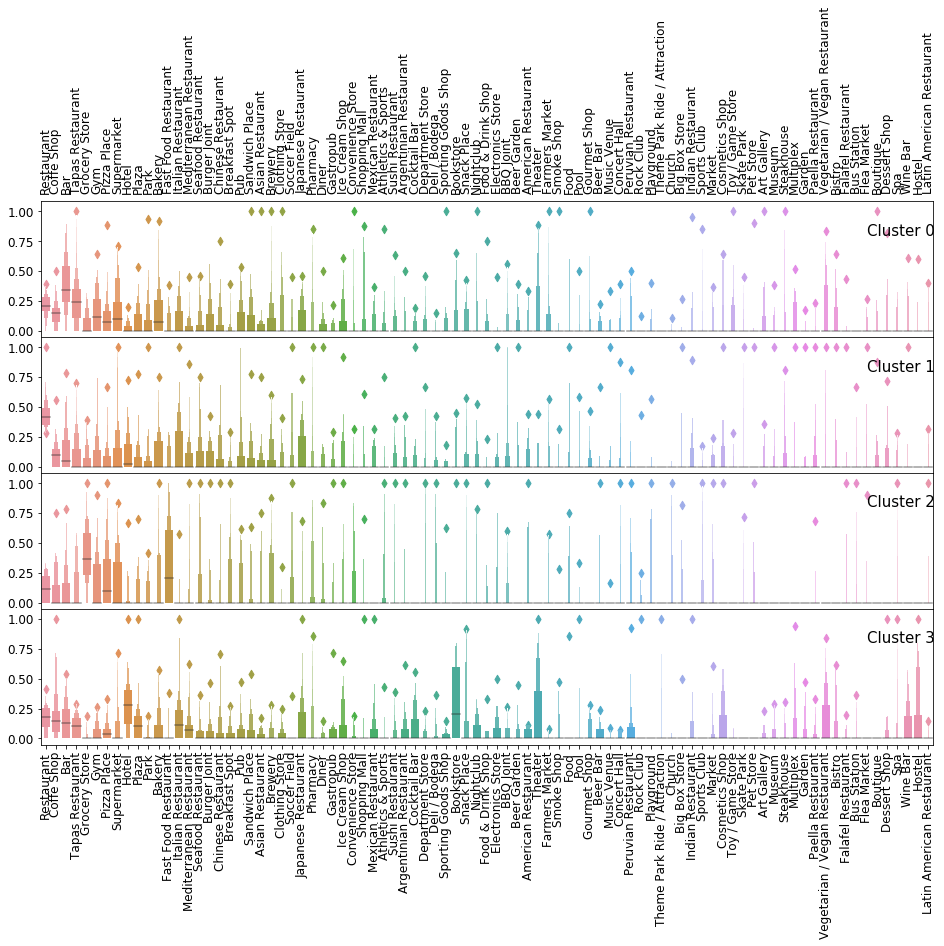

In [218]:
f, axes = plt.subplots(kclusters, 1, figsize=(16, 10), sharex=True)
# Remove horizontal space between axes
f.subplots_adjust(hspace=0)

for i in range(kclusters):
    sns.boxenplot(ax=axes[i],data=madrid_norm[madrid_norm['Cluster Labels'] == i].iloc[:,2:89])
    axes[i].text(80, 0.8, r'Cluster {}'.format(i), fontsize=15)
    axes[i].tick_params(axis='both', which='major', labelsize=12)

axes[0].xaxis.set_tick_params(labeltop=True,rotation=90)
    
plt.xticks(rotation=90)
plt.show()

In [202]:
show_in_map(madrid_merged, kclusters)

## Save the results

In [254]:
print('madrid_merged: ', madrid_merged.shape)
print('madrid_onehot_clusters.dropna(axis=1): ', madrid_onehot_clusters.dropna(axis=1).shape)
madrid_merged.to_csv('madrid_merged_clusters5_result.csv')
madrid_onehot_clusters.dropna(axis=1).to_csv('madrid_onehot_clusters5_result.csv')

madrid_merged:  (199, 15)
madrid_onehot_clusters.dropna(axis=1):  (202, 300)


In [255]:
# Save the training model
import pickle

# save the classifier
with open('madrid_kmeans_model.pkl', 'wb') as fid:
    pickle.dump(kmeans, fid)    



### Cluster 0

In [250]:
cluster0 = madrid_merged[madrid_merged['Cluster Labels'] == 0].index
cluster1 = madrid_merged[madrid_merged['Cluster Labels'] == 1].index
cluster2 = madrid_merged[madrid_merged['Cluster Labels'] == 2].index
cluster3 = madrid_merged[madrid_merged['Cluster Labels'] == 3].index

madrid_merged.loc[cluster0].iloc[:,5:].head()

1st Most Common Venue 2nd Most Common Venue 3rd Most Common Venue  \
432            Restaurant      Tapas Restaurant                   Bar   
509            Restaurant      Tapas Restaurant                Bakery   
774                  Park            Restaurant           Pizza Place   
786            Restaurant                   Bar            Coffe Shop   
891            Restaurant            Coffe Shop                   Bar   

    4th Most Common Venue 5th Most Common Venue 6th Most Common Venue  \
432            Coffe Shop         Grocery Store           Supermarket   
509                   Bar                   Pub           Pizza Place   
774            Skate Park      Sushi Restaurant           Supermarket   
786                Museum                 Hotel        Ice Cream Shop   
891      Tapas Restaurant         Grocery Store                   Gym   

    7th Most Common Venue 8th Most Common Venue 9th Most Common Venue  \
432                Bakery          Soccer Field   Japanese Restaurant   
509           Supermarket                   Gym    Seafood Restaurant   
774        Clothing Store      Tapas Restaurant            Coffe Shop   
786    Athletics & Sports    Italian Restaurant           Art Gallery   
891           Pizza Place    Athletics & Sports     Food & Drink Shop   

    10th Most Common Venue  
432     Italian Restaurant  
509       Kebab Restaurant  
774               Boutique  
786                 Bakery  
891                 Bakery

### Cluster 1

In [251]:
madrid_merged.loc[cluster1].iloc[:,5:].head()

1st Most Common Venue 2nd Most Common Venue 3rd Most Common Venue  \
6              Restaurant                   Bar         Grocery Store   
427            Restaurant       Automotive Shop          Soccer Field   
677            Restaurant      Tapas Restaurant            Coffe Shop   
941            Restaurant                   Gym                   Bar   
967            Restaurant    Italian Restaurant            Coffe Shop   

    4th Most Common Venue 5th Most Common Venue 6th Most Common Venue  \
6             Pizza Place    Seafood Restaurant                 Hotel   
427            Skate Park      Basketball Court          Tennis Court   
677    Italian Restaurant                   Bar                Bakery   
941           Supermarket    Italian Restaurant                  Food   
967    Chinese Restaurant                 Hotel  Fast Food Restaurant   

    7th Most Common Venue   8th Most Common Venue 9th Most Common Venue  \
6                  Bakery      Frozen Yogurt Shop      Kebab Restaurant   
427      Kebab Restaurant      Miscellaneous Shop              Building   
677    Mexican Restaurant                   Plaza   Japanese Restaurant   
941            Sports Bar                   Diner   Japanese Restaurant   
967     Electronics Store  Argentinian Restaurant          Burger Joint   

            10th Most Common Venue  
6                        Gastropub  
427  Paper / Office Supplies Store  
677                   Burger Joint  
941               Asian Restaurant  
967             Seafood Restaurant

### Cluster 2

In [252]:
madrid_merged.loc[cluster2].iloc[:,5:].head()

1st Most Common Venue 2nd Most Common Venue 3rd Most Common Venue  \
0        Asian Restaurant                   Bar         Grocery Store   
372                   Bar            Restaurant           Pizza Place   
767            Restaurant         Grocery Store              Pharmacy   
850         Grocery Store           Pizza Place  Fast Food Restaurant   
859          Burger Joint                Bakery           Pizza Place   

    4th Most Common Venue    5th Most Common Venue 6th Most Common Venue  \
0             Pizza Place       Chinese Restaurant              Building   
372     Electronics Store      American Restaurant        Soccer Stadium   
767      Sushi Restaurant              Supermarket            Skate Park   
850            Coffe Shop  Fruit & Vegetable Store    Chinese Restaurant   
859           Supermarket                      Pub             BBQ Joint   

    7th Most Common Venue 8th Most Common Venue 9th Most Common Venue  \
0       German Restaurant        Soccer Stadium      Kebab Restaurant   
372  Fast Food Restaurant         Big Box Store         Grocery Store   
767      Asian Restaurant     German Restaurant    Miscellaneous Shop   
850          Neighborhood      Kebab Restaurant    Miscellaneous Shop   
859        Sandwich Place               Brewery        Ice Cream Shop   

    10th Most Common Venue  
0       Miscellaneous Shop  
372                    Gym  
767               Building  
850               Building  
859            Snack Place

### Cluster 3

In [253]:
madrid_merged.loc[cluster3].iloc[:,5:].head()

1st Most Common Venue 2nd Most Common Venue 3rd Most Common Venue  \
47             Restaurant                 Hotel                   Bar   
147            Restaurant            Coffe Shop                 Hotel   
206            Restaurant                 Hotel         Grocery Store   
264            Coffe Shop    Mexican Restaurant                   Bar   
272            Restaurant                   Bar                 Plaza   

    4th Most Common Venue 5th Most Common Venue     6th Most Common Venue  \
47             Coffe Shop               Theater          Tapas Restaurant   
147                   Bar                Garden            Sandwich Place   
206                Garden             Bookstore                    Museum   
264     Fish & Chips Shop          Tennis Court  Mediterranean Restaurant   
272            Coffe Shop        Ice Cream Shop       Japanese Restaurant   

        7th Most Common Venue 8th Most Common Venue     9th Most Common Venue  \
47                  Jazz Club             Bookstore                    Hostel   
147  Mediterranean Restaurant    Italian Restaurant                    Museum   
206            Sandwich Place            Art Museum          Tapas Restaurant   
264        Italian Restaurant     German Restaurant          Kebab Restaurant   
272              Cocktail Bar               Brewery  Mediterranean Restaurant   

    10th Most Common Venue  
47      Mexican Restaurant  
147             Art Museum  
206     Falafel Restaurant  
264     Miscellaneous Shop  
272              Nightclub